In [34]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [35]:
def join_single_result(lines):
    single_result = ""
    all_results = []
    for line in lines:
        single_result += line
        if line.startswith("Path cost:"):
            all_results.append(single_result)
            single_result = ""

    return all_results

In [36]:
bfs_visited = []
bfs_length = []
bfs_cost = []

dfs_visited = []
dfs_length = []
dfs_cost = []

ucs_visited = []
ucs_length = []
ucs_cost = []

gfs_euclidian_visited = []
gfs_euclidian_length = []
gfs_euclidian_cost = []

gfs_manhattan_visited = []
gfs_manhattan_length = []
gfs_manhattan_cost = []

astar_euclidian_visited = []
astar_euclidian_length = []
astar_euclidian_cost = []

astar_manhattan_visited = []
astar_manhattan_length = []
astar_manhattan_cost = []

maps = []

for map_path in sorted(list(pathlib.Path("results").glob("*"))):

    level = None
    with open(map_path) as file:
        lines = file.readlines()[3:]
        for single_result in join_single_result(lines):
            if level is None:
                level = single_result.split("\n\n")[0]
            else:
                assert level == single_result.split("\n\n")[0]

            metrics = single_result.split("\n\n")[1].split("\n")

            if len(metrics)==7:
                algorithm_name = metrics[0].split(": ")[1]
                heuristic_name = metrics[1].split(": ")[1]
                visited = int(metrics[3].split(": ")[1])
                length = int(metrics[4].split(": ")[1])
                cost = float(metrics[5].split(": ")[1])
            elif len(metrics)==6:
                algorithm_name = metrics[0].split(": ")[1]
                heuristic_name = metrics[1].split(": ")[1]
                visited = int(metrics[2].split(": ")[1])
                length = int(metrics[3].split(": ")[1])
                cost = float(metrics[4].split(": ")[1])
            else:
                raise Exception(f"Invalid number of metrics lines in {map_path.stem}")

            if algorithm_name == "bfs":
                bfs_visited.append(visited)
                bfs_length.append(length)
                bfs_cost.append(cost)
            elif algorithm_name == "dfs":
                dfs_visited.append(visited)
                dfs_length.append(length)
                dfs_cost.append(cost)
            elif algorithm_name == "ucs":
                ucs_visited.append(visited)
                ucs_length.append(length)
                ucs_cost.append(cost)
            elif algorithm_name == "greedy" and heuristic_name == "euclidian":
                gfs_euclidian_visited.append(visited)
                gfs_euclidian_length.append(length)
                gfs_euclidian_cost.append(cost)
            elif algorithm_name == "greedy" and heuristic_name == "manhattan":
                gfs_manhattan_visited.append(visited)
                gfs_manhattan_length.append(length)
                gfs_manhattan_cost.append(cost)
            elif algorithm_name == "astar" and heuristic_name == "euclidian":
                astar_euclidian_visited.append(visited)
                astar_euclidian_length.append(length)
                astar_euclidian_cost.append(cost)
            elif algorithm_name == "astar" and heuristic_name == "manhattan":
                astar_manhattan_visited.append(visited)
                astar_manhattan_length.append(length)
                astar_manhattan_cost.append(cost)
                maps.append(map_path.stem)
            else:
                raise Exception(f"Invalid algorithm name {algorithm_name} and heuristic {heuristic_name}")

In [37]:
df = pd.DataFrame({
"bfs_visited": bfs_visited,
"bfs_length": bfs_length,
"bfs_cost": bfs_cost,
"dfs_visited": dfs_visited,
"dfs_length": dfs_length,
"dfs_cost": dfs_cost,
"ucs_visited": ucs_visited,
"ucs_length": ucs_length,
"ucs_cost": ucs_cost,
"gfs_euclidian_visited": gfs_euclidian_visited,
"gfs_euclidian_length": gfs_euclidian_length,
"gfs_euclidian_cost": gfs_euclidian_cost,
"gfs_manhattan_visited": gfs_manhattan_visited,
"gfs_manhattan_length": gfs_manhattan_length,
"gfs_manhattan_cost": gfs_manhattan_cost,
"astar_euclidian_visited": astar_euclidian_visited,
"astar_euclidian_length": astar_euclidian_length,
"astar_euclidian_cost": astar_euclidian_cost,
"astar_manhattan_visited": astar_manhattan_visited,
"astar_manhattan_length": astar_manhattan_length,
"astar_manhattan_cost": astar_manhattan_cost,
}, index=maps)

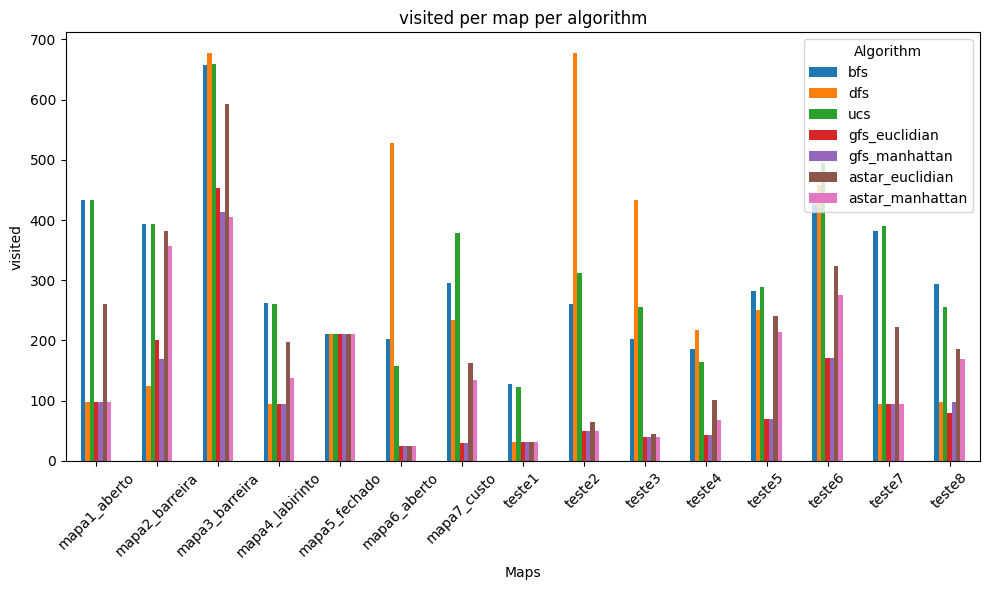

In [38]:
def plot_visited_by_algorithm(df, metric):
    metric_cols = [col for col in df.columns if metric in col]
    
    metric_data = df[metric_cols]
    
    visited_means = metric_data.groupby(level=0).mean()
    
    visited_means.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{metric} per map per algorithm')
    plt.xlabel('Maps')
    plt.ylabel(f'{metric}')
    plt.xticks(rotation=45)
    plt.legend(['_'.join(col.split('_')[:-1]) for col in metric_cols], title='Algorithm', loc='upper right')
    plt.tight_layout()

plot_visited_by_algorithm(df, 'visited')

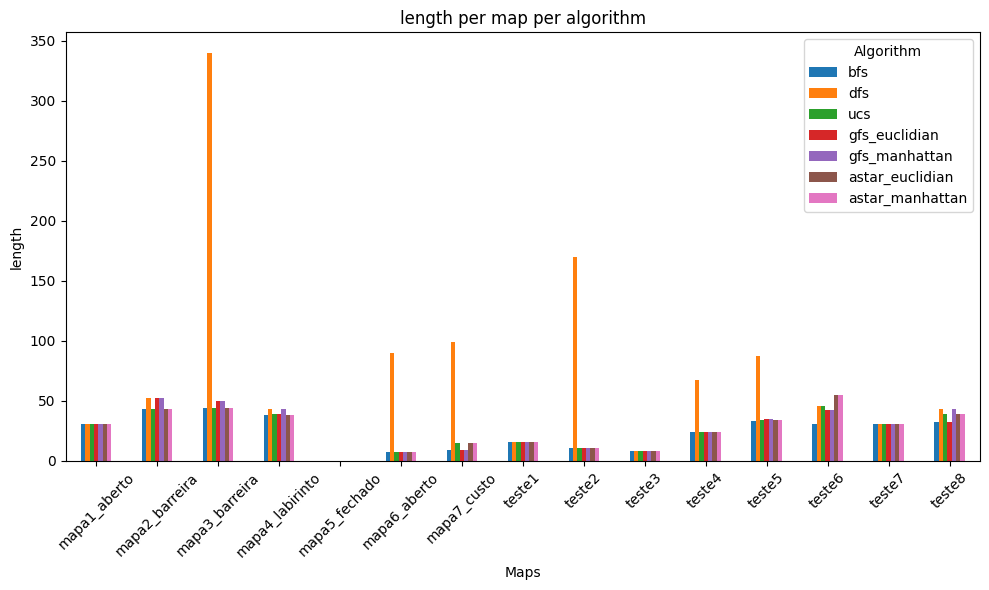

In [39]:
plot_visited_by_algorithm(df, 'length')

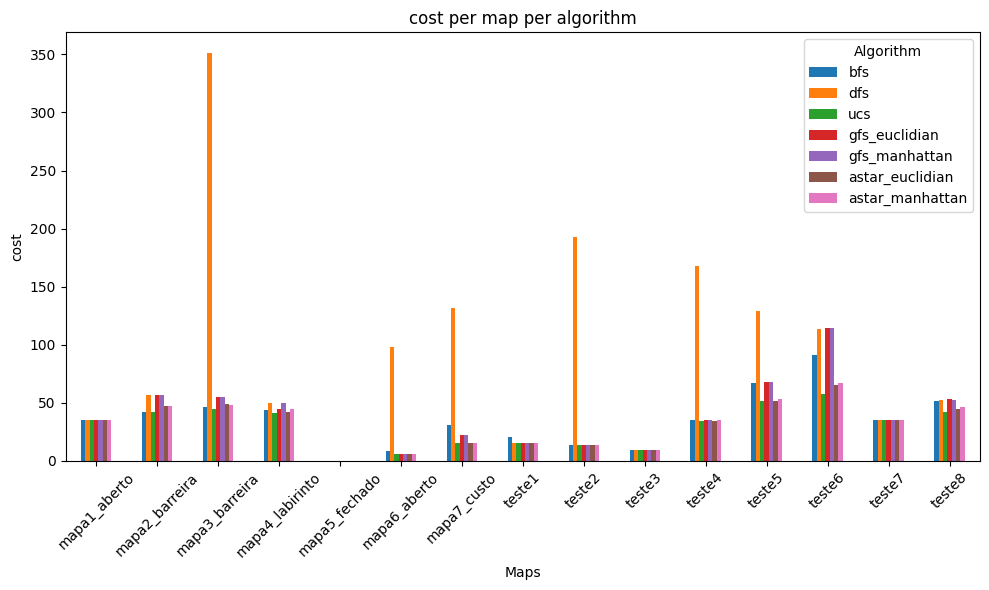

In [40]:
plot_visited_by_algorithm(df, 'cost')